# Brooke Hunter Lab 2 Submission Notebook

## Lab 2a: Exploring wildfire occurrence data in Python

**Objectives:**
   * Explore a large wildfire dataset using `pandas` and `geopandas`.
   * Query `pandas DataFrames` and find descriptive statistics
   * Filter and aggregate `pandas DataFrames`
   * Plot time-series data

### Download the data for the lab

We will be using a wildfire dataset for 1992-2018 period compiled from US federal, state, and local reporting systems by the Forest Service. More info can be found here: https://www.fs.usda.gov/rds/archive/Catalog/RDS-2013-0009.5. Since the max file size for GitHub is 2 GB, the lab data will be available on Dropbox. See Slack (or Canvas) for the Dropbox link. 

Once you have launched the notebook and downloaded the data, we are ready to begin...

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Apply filters

In [2]:
# Define data filepath
# I just put it all in one line because I was having an issue with it concatenating correctly... 
# Read data
df = gpd.read_file('E:\GitHub\GeospatialDataAnalysis\geospatial-data-science\labs\lab2\data\or_1992-2018.shp') # 'df' stands for DataFrame

### Examples from lab notebook below

In [3]:
# Filter fires larger than 100 acres
df_large = df.copy()  # To fix error later on. Jon showed me how to. 
df_large = df[df['FIRE_SIZE'] > 100]

In [4]:
# Find mean size of wildfires larger than 100 acres
df_large['FIRE_SIZE'].mean()

5077.047927022739

In [5]:
# Find the different cause of large wildfires
df_large['NWCG_CAUSE'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [6]:
# Filter fires that were caused by natural causes
df_large_natural = df_large.copy()
df_large_natural = df_large_natural[df_large_natural['NWCG_CAUSE'] == 'Natural']

### `datetime` functionality

In [7]:
# Find date of discovery
df_large_natural['DISCOVERY_']

56       2008/07/02 00:00:00.000
89       2000/07/22 00:00:00.000
95       2007/08/31 00:00:00.000
96       2003/06/29 00:00:00.000
109      2007/07/13 00:00:00.000
                  ...           
67007    2017/08/29 00:00:00.000
67008    2011/09/15 00:00:00.000
67014    2014/09/16 00:00:00.000
67017    2013/08/07 00:00:00.000
67022    2016/08/17 00:00:00.000
Name: DISCOVERY_, Length: 1164, dtype: object

`pandas` contains extensive capabilities and features for working with time series data. But to access this functionality, we need to convert the datatype of this column from `object` to `datetime64`. 

In [8]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [9]:
df_large_natural['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!
#Jon was right, he and I chatted about how to fix this! I cannot claim I figured that out on my own. 

In [10]:
# Filter large, natural wildfires in 2016
df_large_natural_2016 = df_large_natural[df_large_natural['datetime'].dt.year == 2016]

### Group by categories

*********

## Question 1 (20 points): 

Make a **new file** (either a Jupyter Notebook or Spyder `.py` file) and name it `lab2_submission.ipynb`. Write some code to answer the following questions:

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)
* b) Which **month** had the most **natural** caused wildfires **>100 acres**?
* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?
* d) What is the name, date, and county of the **largest sized fire**?
* e) How many wildfires in **Lane County** were **>50 acres**?

*Remember, focus on adapting the example code rather than writing your own from scratch.*
**************

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)

**Answer**
Wasco County had the most human caused fires Greater than 50 acres. Work below.

In [11]:
#create a deep copy of df (df_gt_50) then subset it for fires greater than 50 acres
df_gt_50_hum = df.copy()
df_gt_50_hum = df_gt_50_hum[(df_gt_50_hum['FIRE_SIZE'] > 50)&(df_gt_50_hum['NWCG_CAUSE'] == 'Human')]
df_gt_50_hum['FIPS_NAME'].describe()['top']

'Wasco County'

* b) Which **month** had the most **natural** caused wildfires **>100 acres**?

***Answer*** August had the most natural wildfires greater than 100 acres (549 fires).

In [12]:
#create a deep copy of df (df_gt_100) then subset it for fires greater than 100 acres
df_gt_100_nat = df.copy()
df_gt_100_nat = df_gt_100_nat[df_gt_100_nat['FIRE_SIZE'] > 100]
df_gt_100_nat = df_gt_100_nat[df_gt_100_nat['NWCG_CAUSE'] == 'Natural']

datetime = pd.to_datetime(df_gt_100_nat['DISCOVERY_'],format='%Y/%m/%d %H:%M:%S.%f')
df_gt_100_nat['datetime'] = datetime

Month_Count = df_gt_100_nat.iloc[:,0].groupby(df_gt_100_nat['datetime'].dt.month).count()
Month_Count[Month_Count == Month_Count.max()]

datetime
8    549
Name: OBJECTID, dtype: int64

* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?
***Answer*** There were 13 fires larger than 200 acres with undetermined cause.

In [13]:
#create a deep copy of df (df_gt_200) then subset it for fires greater than 100 acres
df_gt_200 = df.copy()
df_gt_200 = df_gt_200[df_gt_200['FIRE_SIZE'] > 200]
Cause_Count = df_gt_200.iloc[:,0].groupby(df_gt_200['NWCG_CAUSE']).count()['Missing data/not specified/undetermined']
Cause_Count

13

* d) What is the name, date, and county of the **largest sized fire**?
***Answer*** 
The Long Draw Fire in Malheur County was discovered on July 8th 2012 and contained on July 30th 2012.

In [14]:
Largest_Fire = df[df['FIRE_SIZE'] == df['FIRE_SIZE'].max()]
Largest_Fire[['FIRE_NAME','DISCOVERY_','CONT_DATE','FIPS_NAME']]['FIRE_NAME']


66964    LONG DRAW
Name: FIRE_NAME, dtype: object

* e) How many wildfires in **Lane County** were **>50 acres**?
***Answer*** There were 33 wildfires in Land County larger than 50 acres.

Jon and I noticed that FIPS_NAME and COUNTY give different answers. FIPS_NAME has 33 fires for Lane, while COUNTY only has 10. I think if you look at the COUNTY data some counties are given a number instead of the name sometimes. I am not sure why! But I went with the FIPS_NAME variable because it seems more comprehensive. 

In [15]:
df_gt_50_lc = df[df['FIRE_SIZE']>50].copy()
df_gt_50_lc = df_gt_50_lc[df_gt_50_lc['FIPS_NAME'] == 'Lane County']
df_gt_50_lc.describe()['OBJECTID']['count']



33.0

## Lab 2b: Where are wildfires occurring in Lane County Oregon?

So we have established that there were some fires in Lane County between 1992 and 2018. But what if we wanted to know more about where they were and how many people might have been affected? We can do this using Census Bureau data which provides population estimates at relatively small spatial scales. 

**Objectives:**
   * Introduce Census Bureau data data variables and geographic units using <code>cenpy</code>.
   * Compute how many people were impacted by wildfires in Lane County, Oregon using just a few lines of code
   * Calculate some statistics using the <code>pandas</code> library
   * Produce a chloropleth map

We will be relying heavily on <code>cenpy</code> which is a package that enables automatic discovery and download of US Census Bureau data. <code>cenpy</code> formats Census data as a <code>geopandas</code> DataFrame for analysis in Python or export to GIS software such as QGIS. More information about this package can be found [here](https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?flush_cache=true), [here](https://nbviewer.org/github/cenpy-devs/cenpy/blob/master/notebooks/segregation.ipynb), and the [GitHub repo](https://github.com/cenpy-devs/cenpy).

### Query Census data variables

To download data, we first need to identify the relevant product and variables of interest to us. We will use data from the American Community Survey (ACS) product which provides social and economic information every year but, unlike the Decenniel Survey, only represents a sample (about 3.5 million) of US households. 

In [16]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [17]:
acs.filter_tables('INCOME', by='description')

,description,columns
table_name,,
B05010,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,"[B05010_001E, B05010_002E, B05010_003E, B05010..."
B06010,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,"[B06010_001E, B06010_002E, B06010_003E, B06010..."
B06011,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 I...,"[B06011_001E, B06011_002E, B06011_003E, B06011..."
B07010,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY INDI...,"[B07010_001E, B07010_002E, B07010_003E, B07010..."
B07011,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 I...,"[B07011_001E, B07011_002E, B07011_003E, B07011..."
...,...,...
C17002,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,"[C17002_001E, C17002_002E, C17002_003E, C17002..."
C18131,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,"[C18131_001E, C18131_002E, C18131_003E, C18131..."
C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...,"[C27016_001E, C27016_002E, C27016_003E, C27016..."


Now we need a list of Census variables. One way to do this is to browse the ACS documentation which can be found here: https://api.census.gov/data/2019/acs/acs5/variables.html. The other is to search the tables using keywords and <code>cenpy</code>.

*********

## Question 2 (20 points): 
* a) Write some more code in `lab2_submission.ipynb` to produce a chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Consider choosing a place or variable that inetrests you. The following is a useful guide: https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?flush_cache=true

Note that:
* If your map represents a state, use county level data
* If your map represents a county or city, use tract level data

The following table provides a list of Census variables: https://api.census.gov/data/2019/acs/acs5/variables.html

**************

In [18]:
# download county data from Minnesota for B06011_011E - MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES
Minne = products.ACS(2019).from_state('Minnesota', level='county',
                                        variables=['B06011_001E'])

C:\Users\brdeh\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\brdeh\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\brdeh\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:767: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [19]:
Minne['B06011_001E'].describe()

count       87.000000
mean     32216.643678
std       4349.434286
min      24131.000000
25%      29639.000000
50%      31283.000000
75%      33505.000000
max      45984.000000
Name: B06011_001E, dtype: float64

Text(0.5, 1.0, 'Median Income in the past 12 months')

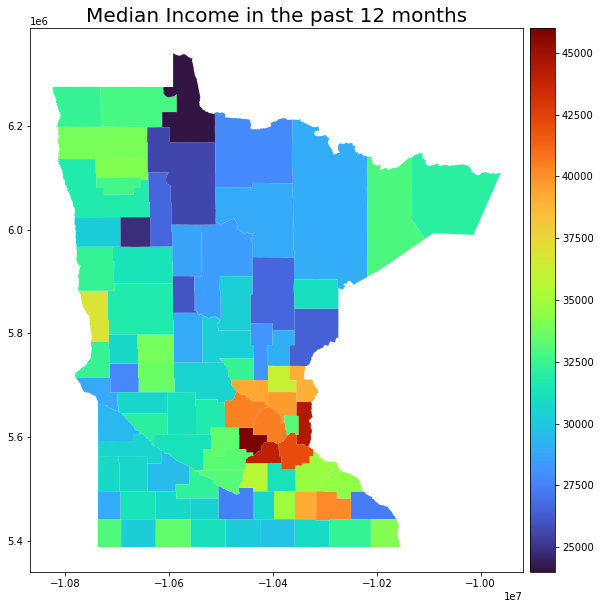

In [20]:
# Chloropleth map of MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(12,10))
# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
Minne.plot('B06011_001E', ax=ax, cmap='turbo', vmin = 24000, vmax = 46000, legend=True, cax=cax)
ax.set_title('Median Income in the past 12 months', fontsize = 20, loc='center')


**************
## Task 3 (10 points):
* a) Save your answers notebook, commit and push to GitHub using instructions from Lab 1
* c) Also upload your answers as a <code>.pdf</code> to Canvas

**************

## Remember to submit your answers to Questions 1 and 2 and Task 3 **by Friday 11:59pm**